# COVID-19 Status (Colombia)

##### Limpieza y ajuste de datos (Desarrollador)*

In [1]:
# Libraries import
from datetime import datetime
from plotly.offline import init_notebook_mode, iplot
import requests
import pandas as pd
import numpy as np
import plotly.graph_objs as go
from googletrans import Translator
import matplotlib.pyplot as plt
import statsmodels.api as sn

In [2]:
# Dataset import - 'Datos abiertos COVID-19 (Colombia)'
data = pd.DataFrame.from_dict(requests.get('https://www.datos.gov.co/resource/gt2j-8ykr.json?$limit=999999999').json())
#data

In [3]:
# Data cleaning and adjusting

# FE DE ERRATAS (2020-05-03): --------------------------------------------------------------------------------------------------------------------------------------------------
#data.loc[(data['Edad'].str.contains('-   -'))] = None
data = data[~data['edad'].str.contains('-   -')]
#---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#translator = Translator()

data.columns = ['Id de caso', 'Fecha de notificación', 'Código DIVIPOLA', 'Ciudad de ubicación', 'Departamento', 'Estado', 'Edad', 'Sexo', 'Tipo', 'Severidad','País de procedencia', 'Fecha de inicio de síntomas', 'Fecha de diagnóstico', 'Fecha de recuperación', 'Fecha de reporte web', 'Tipo de recuperación', 'Código departamento', 'Código país', 'Fecha de defunción']

for column in ['Ciudad de ubicación', 'Estado', 'Sexo', 'Tipo', 'Severidad', 'País de procedencia']:
    data[column] = data[column].str.capitalize()
    
for column in ['Fecha de notificación', 'Fecha de inicio de síntomas', 'Fecha de defunción', 'Fecha de diagnóstico', 'Fecha de recuperación', 'Fecha de reporte web']:
       data[column] = data[column].str.slice(0,10).replace(r'(\d+)-(\d+)-(\d+)', r'\1-\2-\3', regex=True).apply(lambda x: pd.to_datetime(x, dayfirst=True, errors='ignore'))

data.loc[(data['Edad'].str.contains('[a-zA-Z]+', regex=True)), 'Edad'] = 0
data['Clasificación de edad'] = pd.cut(x=data['Edad'].apply(lambda x: float(x)), bins=[-np.inf,10,20,30,40,50,60,70,80,90,np.inf], include_lowest=True, labels=['0 - 10', '10 - 20', '20 - 30', '30 - 40', '40 - 50', '50 - 60', '60 - 70', '70 - 80', '80 - 90', '90 - 100+'])

#data['País de procedencia'] = data['País de procedencia'].apply(Translator().translate, src='es', dest='en').apply(getattr, args=('text',))

data = data[['Id de caso', 'Fecha de diagnóstico', 'Fecha de notificación', 'Fecha de inicio de síntomas', 'Fecha de recuperación', 'Fecha de defunción', 'Fecha de reporte web', 'Ciudad de ubicación', 'Departamento', 'Severidad', 'Estado', 'Edad', 'Clasificación de edad', 'Sexo', 'Tipo', 'Tipo de recuperación', 'País de procedencia', 'Código departamento', 'Código país', 'Código DIVIPOLA']]
data = data.set_index('Id de caso')

date = datetime.today().strftime('%Y-%m-%d')
data.to_csv(f'./Datasets/COVID-19 Status (Colombia) [{date}].csv', index = True)

def numbers(div):
    for i in range(0, len(ax.patches)//div, 1):
        height = 0
        for j in range(0, div, 1):
            height += ax.patches[j*(len(ax.patches)//div)+i].get_height()
        ax.text(ax.patches[i].get_x()+(ax.patches[i].get_width()/15),height+15, int(height), fontsize=10, color='dimgrey', rotation=90)

def numbers_H(div):
    for i in range(0, len(ax.patches)//div, 1):
        width = 0
        for j in range(0, div, 1):
            width += ax.patches[j*(len(ax.patches)//div)+i].get_width()
        ax.text(width+15,ax.patches[i].get_y()+(ax.patches[i].get_height()/15), int(width), fontsize=10, color='dimgrey', rotation=0)

In [4]:
# Test

#data['País de procedencia'].unique().apply(lambda x: Translator().translate(x, src='es', dest='en').text)
#Translator().translate('España', src='es', dest='en').text

In [5]:
# In-line plots libraries import

%matplotlib inline
init_notebook_mode(connected = True)

## Análisis Dataset - COVID-19 (Colombia)

### - Datos Abiertos COVID-19 (Colombia)

In [6]:
data

,Fecha de diagnóstico,Fecha de notificación,Fecha de inicio de síntomas,Fecha de recuperación,Fecha de defunción,Fecha de reporte web,Ciudad de ubicación,Departamento,Severidad,Estado,Edad,Clasificación de edad,Sexo,Tipo,Tipo de recuperación,País de procedencia,Código departamento,Código país,Código DIVIPOLA
Id de caso,,,,,,,,,,,,,,,,,,,
1,2020-03-06 00:00:00,2020-03-02,2020-02-27 00:00:00,2020-03-13,NaT,2020-03-06,Bogotá d.c.,Bogotá D.C.,Leve,Recuperado,19,10 - 20,F,Importado,PCR,Italia,11,380,11001
2,2020-03-09 00:00:00,2020-03-06,2020-03-04 00:00:00,2020-03-19,NaT,2020-03-09,Guadalajara de buga,Valle del Cauca,Leve,Recuperado,34,30 - 40,M,Importado,PCR,España,76,724,76111
3,2020-03-09 00:00:00,2020-03-07,2020-02-29 00:00:00,2020-03-15,NaT,2020-03-09,Medellín,Antioquia,Leve,Recuperado,50,40 - 50,F,Importado,PCR,España,5,724,5001
4,2020-03-11 00:00:00,2020-03-09,2020-03-06 00:00:00,2020-03-26,NaT,2020-03-11,Medellín,Antioquia,Leve,Recuperado,55,50 - 60,M,Relacionado,PCR,NaN,5,NaN,5001
5,2020-03-11 00:00:00,2020-03-09,2020-03-08 00:00:00,2020-03-23,NaT,2020-03-11,Medellín,Antioquia,Leve,Recuperado,25,20 - 30,M,Relacionado,PCR,NaN,5,NaN,5001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53099,2020-06-15 00:00:00,2020-06-09,2020-06-05 00:00:00,NaT,NaT,2020-06-15,Cali,Valle del Cauca,Leve,Casa,23,20 - 30,F,En estudio,NaN,NaN,76,NaN,76001
53100,2020-06-15 00:00:00,2020-06-04,2020-05-27 00:00:00,NaT,NaT,2020-06-15,Cartagena de indias,Cartagena D.T. y C.,Leve,Casa,27,20 - 30,M,En estudio,NaN,NaN,13,NaN,13001
53101,2020-06-15 00:00:00,2020-06-06,2020-06-03 00:00:00,NaT,NaT,2020-06-15,Barranquilla,Barranquilla D.E.,Leve,Casa,22,20 - 30,M,En estudio,NaN,NaN,8,NaN,8001


### - Mapa de influencia - COVID-19 (Colombia) [Beta]

In [7]:
map_data = dict(
    type = 'choropleth',
    locations = data['País de procedencia'],
    locationmode = 'country names',
    colorscale = 'viridis',
    z = data['País de procedencia'].value_counts().tolist())

geo_map = go.Figure(data=[map_data])
iplot(geo_map)

### - Casos confirmados VS Departamento (Sexo)

In [8]:
data.groupby(['Departamento', 'Sexo']).size().unstack().fillna(0)

Sexo,F,M
Departamento,,
Amazonas,834.0,1297.0
Antioquia,789.0,1358.0
Arauca,3.0,42.0
Archipiélago de San Andrés Providencia y Santa Catalina,6.0,13.0
Atlántico,2069.0,2800.0
Barranquilla D.E.,2528.0,3485.0
Bogotá D.C.,7988.0,8416.0
Bolívar,150.0,243.0
Boyacá,130.0,121.0


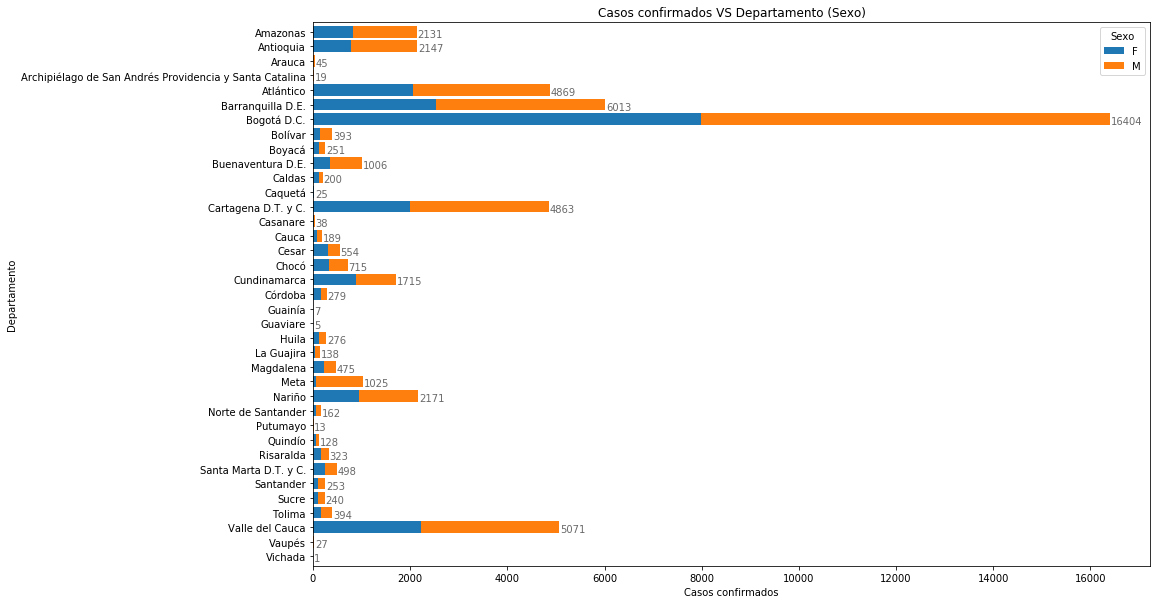

In [9]:
ax = data.groupby(['Departamento', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Departamento (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Departamento (Clasificación de edad)

In [10]:
data.groupby(['Departamento', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad,0 - 10,10 - 20,20 - 30,30 - 40,40 - 50,50 - 60,60 - 70,70 - 80,80 - 90,90 - 100+
Departamento,,,,,,,,,,
Amazonas,96,371,433,430,298,228,147,89,35,4
Antioquia,84,234,598,538,276,248,104,35,27,3
Arauca,1,18,18,6,1,0,1,0,0,0
Archipiélago de San Andrés Providencia y Santa Catalina,0,1,7,4,5,1,1,0,0,0
Atlántico,264,437,1055,1127,755,587,334,200,93,17
Barranquilla D.E.,266,470,1326,1310,913,769,521,267,144,27
Bogotá D.C.,966,1544,3724,3364,2580,2123,1182,583,282,56
Bolívar,18,33,90,77,59,47,36,15,18,0
Boyacá,17,22,56,42,40,29,19,14,9,3


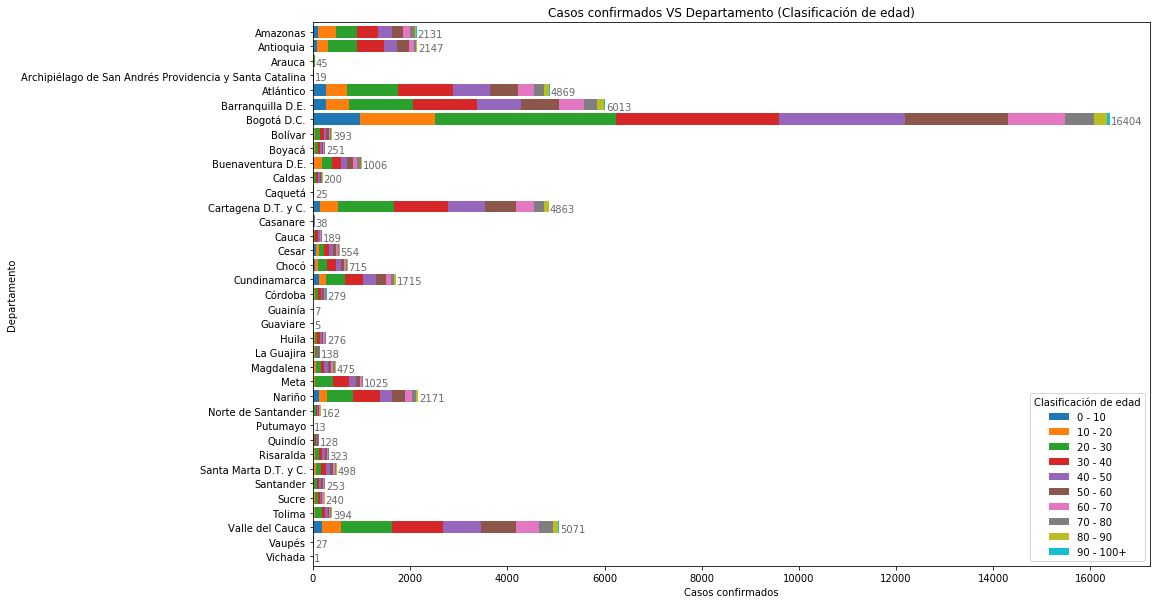

In [11]:
ax = data.groupby(['Departamento', 'Clasificación de edad']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Departamento (Clasificación de edad)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers_H(div)

### - Casos confirmados VS Departamento (Estado)

In [12]:
data.groupby(['Departamento', 'Estado']).size().unstack().fillna(0)

Estado,Casa,Fallecido,Hospital,Hospital uci,N/a,Recuperado
Departamento,,,,,,
Amazonas,681.0,78.0,53.0,9.0,1.0,1309.0
Antioquia,1287.0,9.0,58.0,9.0,2.0,782.0
Arauca,41.0,0.0,2.0,0.0,0.0,2.0
Archipiélago de San Andrés Providencia y Santa Catalina,1.0,0.0,1.0,0.0,0.0,17.0
Atlántico,2964.0,158.0,290.0,52.0,5.0,1400.0
Barranquilla D.E.,3832.0,261.0,438.0,80.0,10.0,1392.0
Bogotá D.C.,8027.0,393.0,923.0,153.0,23.0,6885.0
Bolívar,196.0,18.0,26.0,5.0,1.0,147.0
Boyacá,65.0,9.0,13.0,1.0,5.0,158.0


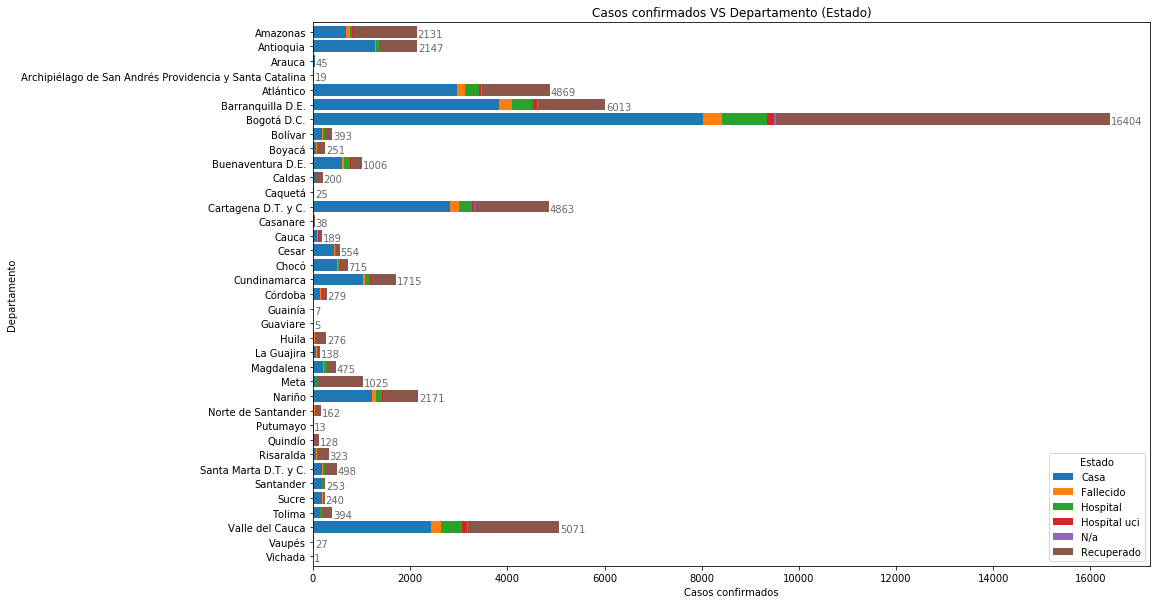

In [13]:
ax = data.groupby(['Departamento', 'Estado']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Departamento (Estado)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Estado'].unique())
numbers_H(div)

### - Casos confirmados VS Estado (Sexo)

In [14]:
data.groupby(['Estado', 'Sexo']).size().unstack().fillna(0)

Sexo,F,M
Estado,,
Casa,12105,15487
Fallecido,652,1074
Hospital,1314,1827
Hospital uci,205,365
N/a,32,50
Recuperado,9042,10910


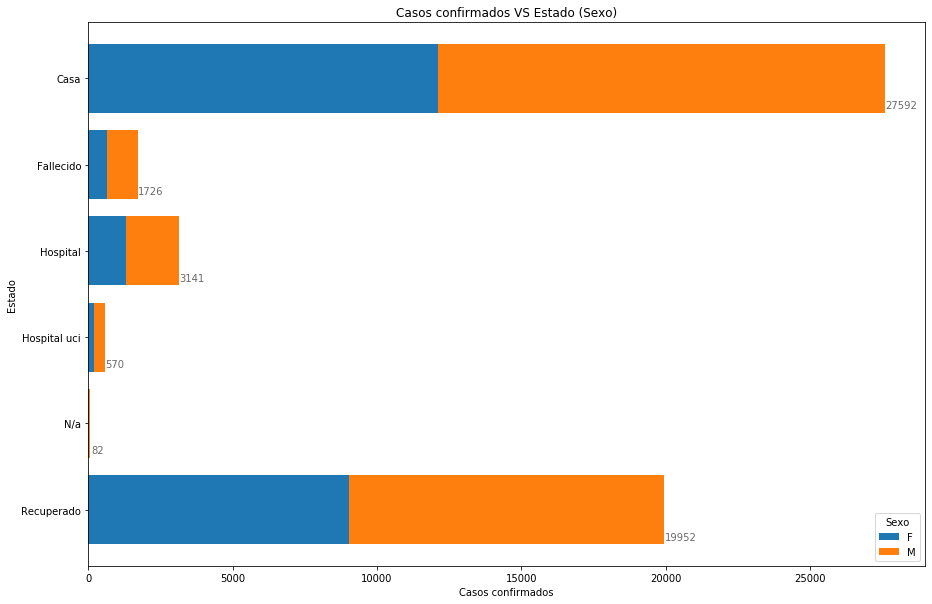

In [15]:
ax = data.groupby(['Estado', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Estado (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Estado (Clasificación de edad)

In [16]:
data.groupby(['Estado', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad,0 - 10,10 - 20,20 - 30,30 - 40,40 - 50,50 - 60,60 - 70,70 - 80,80 - 90,90 - 100+
Estado,,,,,,,,,,
Casa,1446,2925,6899,6377,4099,3085,1658,764,289,50
Fallecido,7,6,26,60,149,262,417,418,304,77
Hospital,94,110,302,444,548,629,503,323,161,27
Hospital uci,20,11,22,65,84,115,135,83,34,1
N/a,4,4,8,8,7,8,14,11,14,4
Recuperado,1022,1805,4845,4526,3144,2472,1252,603,247,36


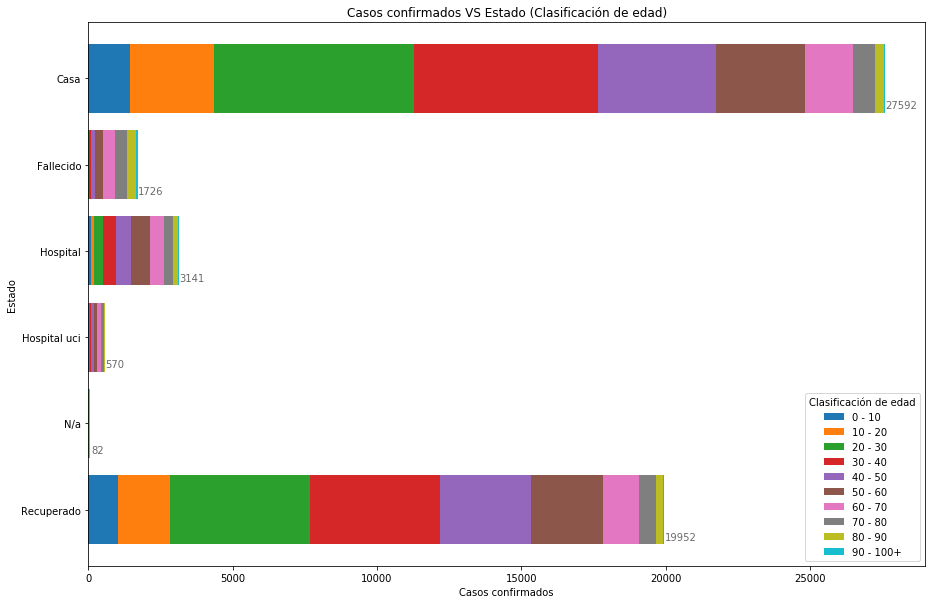

In [17]:
ax = data.groupby(['Estado', 'Clasificación de edad']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Estado (Clasificación de edad)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers_H(div)

### - Casos confirmados VS Tipo de contagio (Sexo)

In [18]:
data.groupby(['Tipo', 'Sexo']).size().unstack().fillna(0)

Sexo,F,M
Tipo,,
En estudio,19630,23175
Importado,407,470
Relacionado,3313,6068


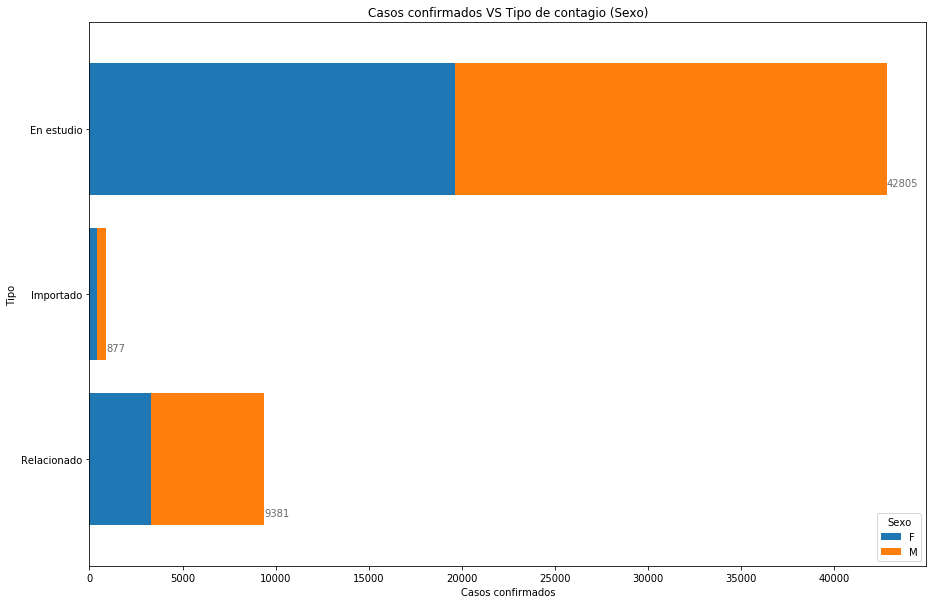

In [19]:
ax = data.groupby(['Tipo', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Tipo de contagio (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Tipo (Clasificación de edad)

In [20]:
data.groupby(['Tipo', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad,0 - 10,10 - 20,20 - 30,30 - 40,40 - 50,50 - 60,60 - 70,70 - 80,80 - 90,90 - 100+
Tipo,,,,,,,,,,
En estudio,2011,3782,9381,9108,6539,5502,3407,1947,952,176
Importado,4,27,214,207,148,144,91,33,9,0
Relacionado,578,1052,2507,2165,1344,925,481,222,88,19


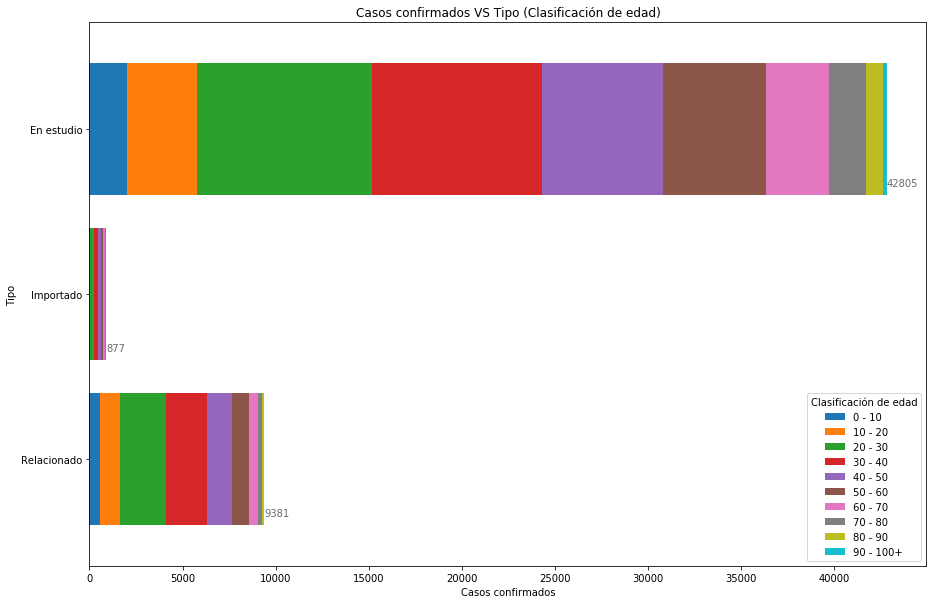

In [21]:
ax = data.groupby(['Tipo', 'Clasificación de edad']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Tipo (Clasificación de edad)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers_H(div)

### - Casos confirmados VS Clasificación de edad (Sexo)

In [22]:
data.groupby(['Clasificación de edad', 'Sexo']).size().unstack().fillna(0)

Sexo,F,M
Clasificación de edad,,
0 - 10,1280,1313
10 - 20,2037,2824
20 - 30,5192,6910
30 - 40,4889,6591
40 - 50,3591,4440
50 - 60,2915,3656
60 - 70,1792,2187
70 - 80,1004,1198
80 - 90,528,521


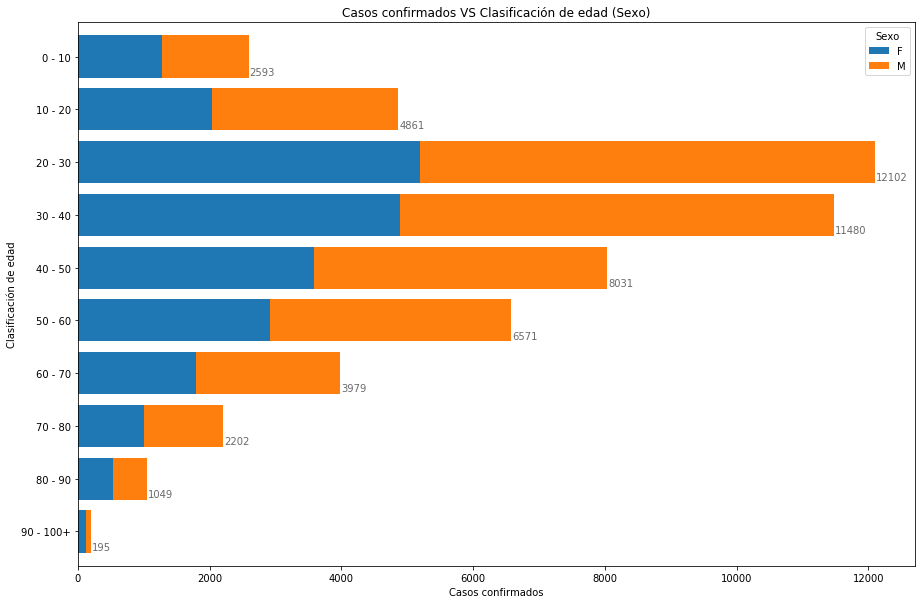

In [23]:
ax = data.groupby(['Clasificación de edad', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Clasificación de edad (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Clasificación de edad (Estado)

In [24]:
data.groupby(['Clasificación de edad', 'Estado']).size().unstack().fillna(0)

Estado,Casa,Fallecido,Hospital,Hospital uci,N/a,Recuperado
Clasificación de edad,,,,,,
0 - 10,1446,7,94,20,4,1022
10 - 20,2925,6,110,11,4,1805
20 - 30,6899,26,302,22,8,4845
30 - 40,6377,60,444,65,8,4526
40 - 50,4099,149,548,84,7,3144
50 - 60,3085,262,629,115,8,2472
60 - 70,1658,417,503,135,14,1252
70 - 80,764,418,323,83,11,603
80 - 90,289,304,161,34,14,247


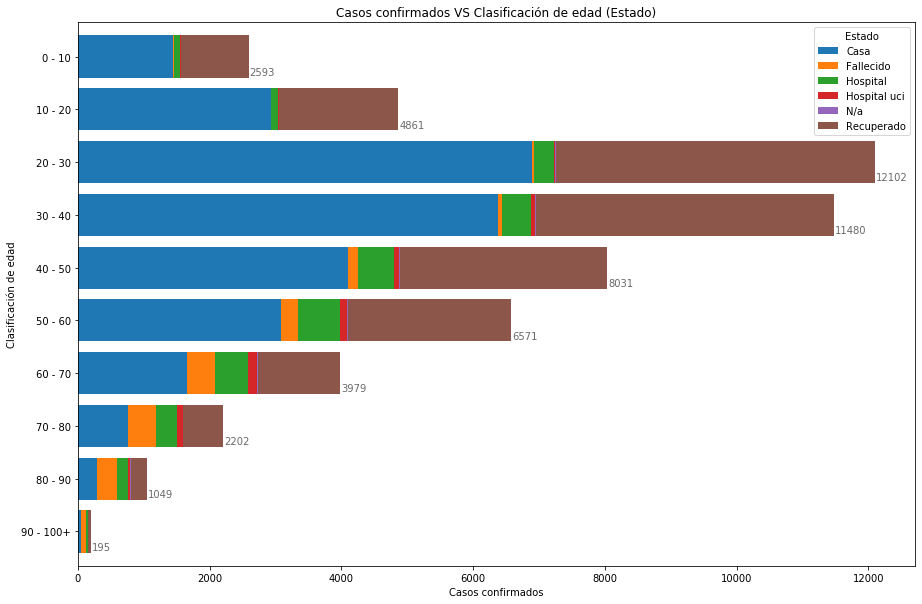

In [25]:
ax = data.groupby(['Clasificación de edad', 'Estado']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Clasificación de edad (Estado)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Estado'].unique())
numbers_H(div)

### - Casos confirmados VS Fecha de diagnóstico (Sexo)

In [26]:
data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0)

Sexo,F,M
Fecha de diagnóstico,,
2020-03-06 00:00:00,1.0,0.0
2020-03-09 00:00:00,1.0,1.0
2020-03-11 00:00:00,4.0,2.0
2020-03-12 00:00:00,5.0,0.0
2020-03-13 00:00:00,2.0,3.0
...,...,...
2020-06-12 00:00:00,511.0,721.0
2020-06-13 00:00:00,813.0,1323.0
2020-06-14 00:00:00,822.0,1345.0


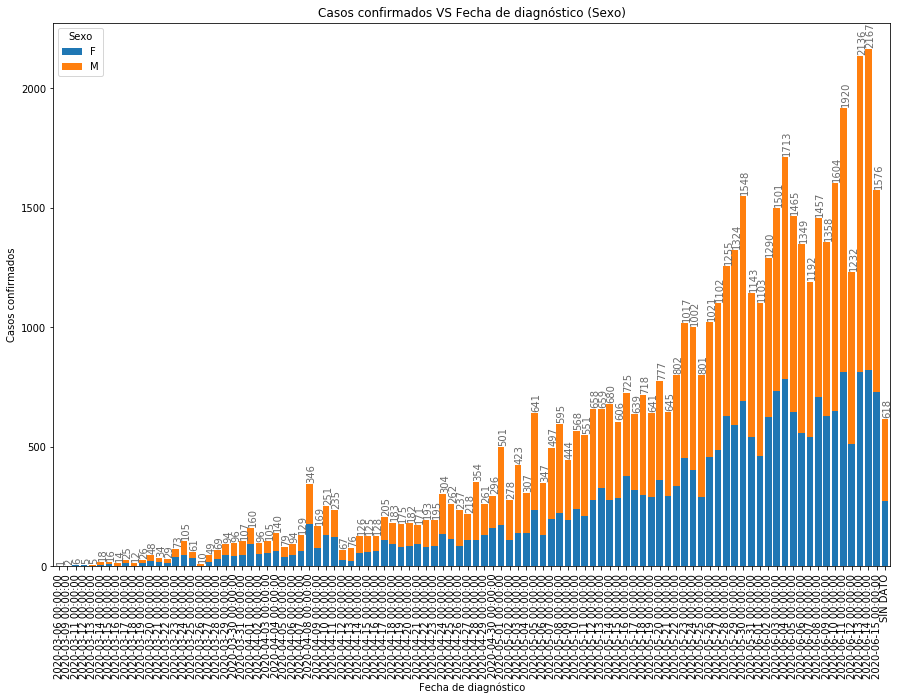

In [27]:
ax = data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Fecha de diagnóstico (Sexo)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers(div)

### - Casos confirmados VS Fecha de diagnóstico (Clasificación de edad)

In [28]:
data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad,0 - 10,10 - 20,20 - 30,30 - 40,40 - 50,50 - 60,60 - 70,70 - 80,80 - 90,90 - 100+
Fecha de diagnóstico,,,,,,,,,,
2020-03-06 00:00:00,0,1,0,0,0,0,0,0,0,0
2020-03-09 00:00:00,0,0,0,1,1,0,0,0,0,0
2020-03-11 00:00:00,0,0,4,0,0,1,0,0,1,0
2020-03-12 00:00:00,0,0,0,1,1,1,1,1,0,0
2020-03-13 00:00:00,0,0,1,0,2,0,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2020-06-12 00:00:00,56,114,291,282,166,142,108,43,26,4
2020-06-13 00:00:00,80,133,503,476,345,282,169,96,44,8
2020-06-14 00:00:00,74,222,553,468,289,278,150,84,42,7


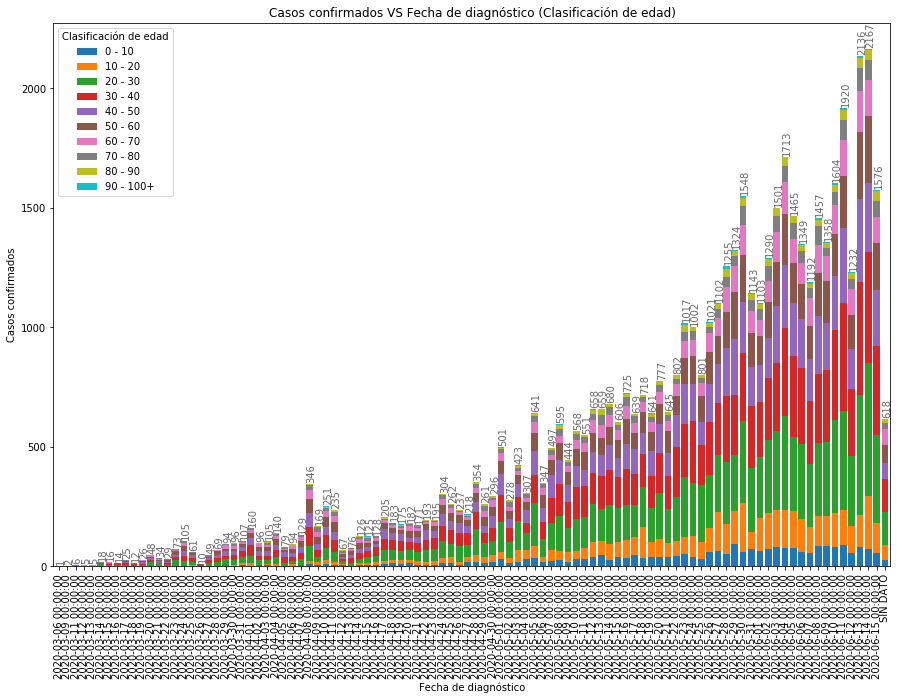

In [29]:
ax = data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Fecha de diagnóstico (Clasificación de edad)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers(div)

### - Casos confirmados VS Fecha de diagnóstico (Estado)

In [30]:
data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0)

Estado,Casa,Fallecido,Hospital,Hospital uci,N/a,Recuperado
Fecha de diagnóstico,,,,,,
2020-03-06 00:00:00,0.0,0.0,0.0,0.0,0.0,1.0
2020-03-09 00:00:00,0.0,0.0,0.0,0.0,0.0,2.0
2020-03-11 00:00:00,0.0,0.0,0.0,0.0,0.0,6.0
2020-03-12 00:00:00,0.0,0.0,0.0,0.0,0.0,5.0
2020-03-13 00:00:00,0.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...
2020-06-12 00:00:00,1108.0,21.0,95.0,8.0,0.0,0.0
2020-06-13 00:00:00,1662.0,48.0,392.0,34.0,0.0,0.0
2020-06-14 00:00:00,1945.0,22.0,161.0,37.0,2.0,0.0


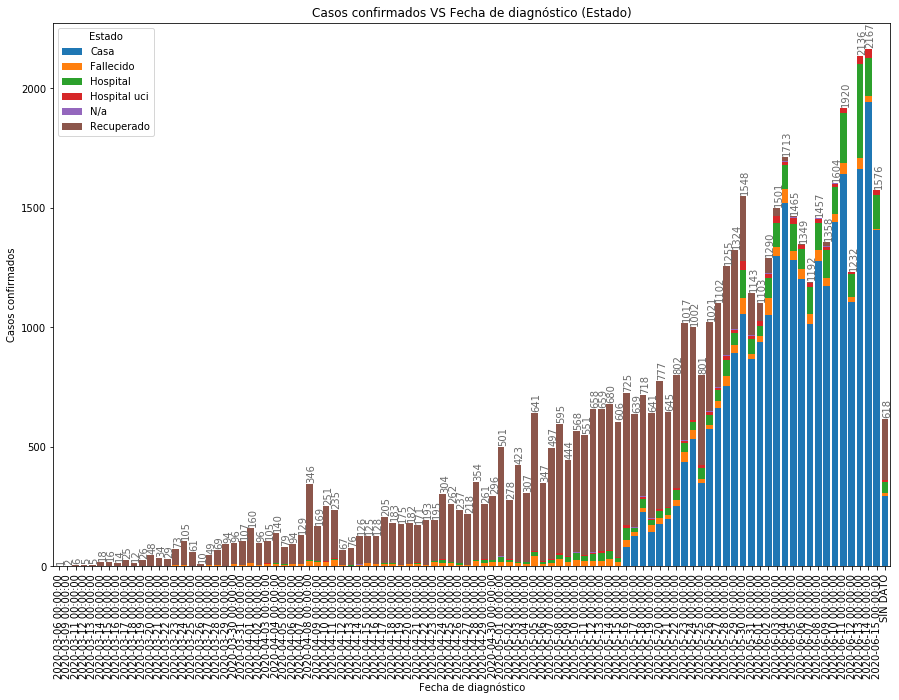

In [31]:
ax = data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Fecha de diagnóstico (Estado)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Estado'].unique())
numbers(div)

### - Casos confirmados acumulado VS Fecha de diagnóstico (Sexo)

In [32]:
data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0).cumsum()

Sexo,F,M
Fecha de diagnóstico,,
2020-03-06 00:00:00,1.0,0.0
2020-03-09 00:00:00,2.0,1.0
2020-03-11 00:00:00,6.0,3.0
2020-03-12 00:00:00,11.0,3.0
2020-03-13 00:00:00,13.0,6.0
...,...,...
2020-06-12 00:00:00,20710.0,25856.0
2020-06-13 00:00:00,21523.0,27179.0
2020-06-14 00:00:00,22345.0,28524.0


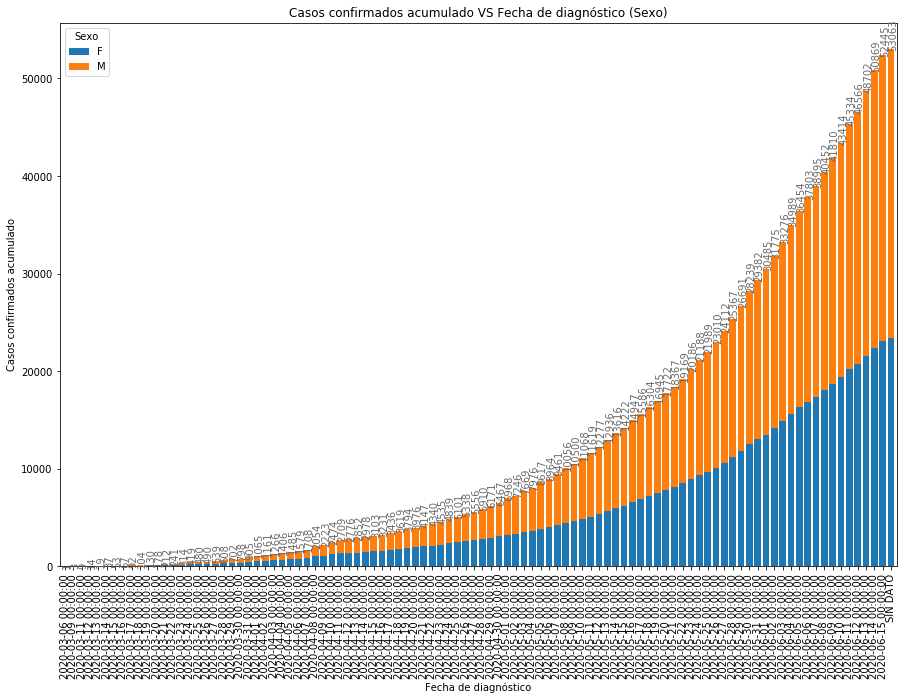

In [33]:
ax = data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0).cumsum().plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados acumulado VS Fecha de diagnóstico (Sexo)'))
ax.set_ylabel('Casos confirmados acumulado')
div = len(data['Sexo'].unique())
numbers(div)

### - Casos confirmados acumulado VS Fecha de diagnóstico (Clasificación de edad)

In [34]:
data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0).cumsum()

Clasificación de edad,0 - 10,10 - 20,20 - 30,30 - 40,40 - 50,50 - 60,60 - 70,70 - 80,80 - 90,90 - 100+
Fecha de diagnóstico,,,,,,,,,,
2020-03-06 00:00:00,0,1,0,0,0,0,0,0,0,0
2020-03-09 00:00:00,0,1,0,1,1,0,0,0,0,0
2020-03-11 00:00:00,0,1,4,1,1,1,0,0,1,0
2020-03-12 00:00:00,0,1,4,2,2,2,1,1,1,0
2020-03-13 00:00:00,0,1,5,2,4,2,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...
2020-06-12 00:00:00,2357,4319,10539,10025,7093,5738,3489,1926,908,172
2020-06-13 00:00:00,2437,4452,11042,10501,7438,6020,3658,2022,952,180
2020-06-14 00:00:00,2511,4674,11595,10969,7727,6298,3808,2106,994,187


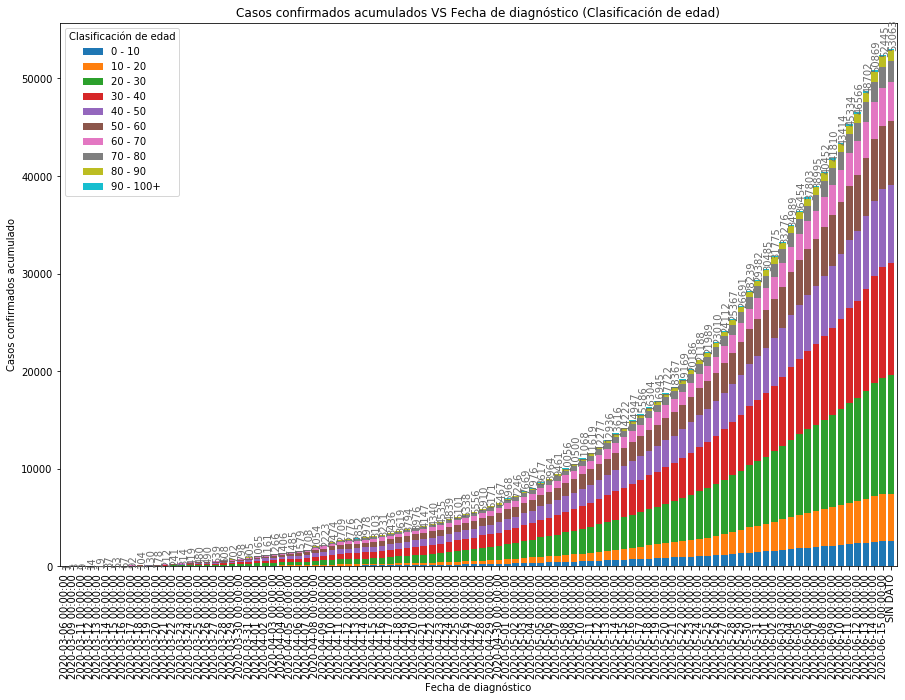

In [35]:
ax = data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0).cumsum().plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados acumulados VS Fecha de diagnóstico (Clasificación de edad)'))
ax.set_ylabel('Casos confirmados acumulado')
div = len(data['Clasificación de edad'].unique())
numbers(div)

### - Casos confirmados acumulado VS Fecha de diagnóstico (Estado)

In [36]:
data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0).cumsum()

Estado,Casa,Fallecido,Hospital,Hospital uci,N/a,Recuperado
Fecha de diagnóstico,,,,,,
2020-03-06 00:00:00,0.0,0.0,0.0,0.0,0.0,1.0
2020-03-09 00:00:00,0.0,0.0,0.0,0.0,0.0,3.0
2020-03-11 00:00:00,0.0,0.0,0.0,0.0,0.0,9.0
2020-03-12 00:00:00,0.0,0.0,0.0,0.0,0.0,14.0
2020-03-13 00:00:00,0.0,0.0,0.0,0.0,0.0,19.0
...,...,...,...,...,...,...
2020-06-12 00:00:00,22284.0,1641.0,2397.0,467.0,80.0,19697.0
2020-06-13 00:00:00,23946.0,1689.0,2789.0,501.0,80.0,19697.0
2020-06-14 00:00:00,25891.0,1711.0,2950.0,538.0,82.0,19697.0


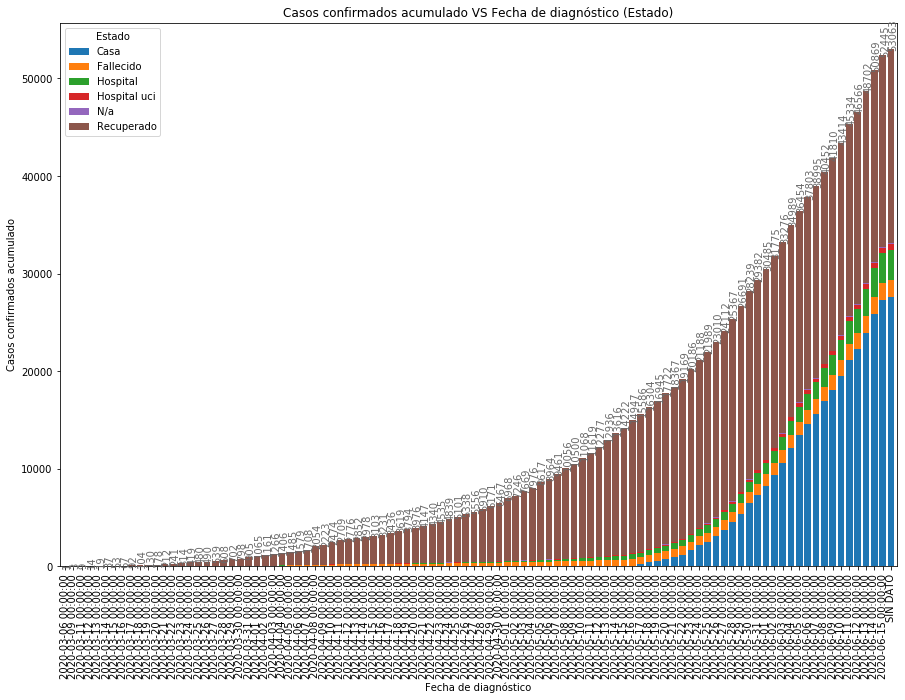

In [37]:
ax = data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0).cumsum().plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados acumulado VS Fecha de diagnóstico (Estado)'))
ax.set_ylabel('Casos confirmados acumulado')
div = len(data['Estado'].unique())
numbers(div)

## #StayHome #QuedateEnCasa

### Made with ♥ by <a href='https://github.com/jlcadavid'>@jlcadavid</a>